# PRACTICA Potenciales Evocados

Created on Fri Apr 16 09:39:45 2021

@author: pbonomini

POTENCIALES EVOCADOS HOMOGENEOS (PEs 1)



### Promedio homogéneo

**Supuestos:**


*   Ruido con media cero y varianza uniforme a través de las realizaciones
*   Ruido descorrelacionado (ruido blanco)
*   Potencial con morfología y amplitud uniforme en cada realización (determinista)
*   Ruido es aditivo; se suma a la señal del PE

$x_i[n] = s[n] + v_i[n]$

Siendo $s[n]$ el componente determinístico y $v_i[n]$ el componente aleatorio

Importo librerías que voy a utilizar:

In [1]:
# importo módulos a utilizar
import numpy as np
import matplotlib.pyplot as plt
import math

## Creación de tira de EEG con PE de manera artificial

Armo una función que genere el ensamble de potenciales evocados. Creo potencial evocado artificial mediante un seno amortiguado por una exponencial negativa. Luego concateno el PE con una latencia (ceros delante del PE). Armo un ensamble con eso. Le sumo un ensamble de ruido blanco de las mismas dimensiones.

In [2]:
def creoensamble(M = 100, L = 100, N = 300, fs = 256, sigma2_v=1):
  
  # M Cantidad de Potenciales del ensamble
  # L Latencia antes del potencial
  # N Largo total de la señal con la latencia incluida
  # fs frecuencia de muestreo
  # sigma2_v Varianza del ruido
  f = 5
  n = np.arange(0,(N-L)/fs,1/fs)
  pe = np.sin(2*np.pi*f*n) * (np.exp(-5*n))
  PE = np.concatenate((np.zeros(L), pe))
  S = np.outer(np.ones(M), PE)
  V = np.random.normal(loc=0.0, scale=np.sqrt(sigma2_v), size=(M, N))
  X = S + V
  return PE,X

Llamo a la funcion que genera el ensamble. Armo la tira de PEs a partir del ensamble.

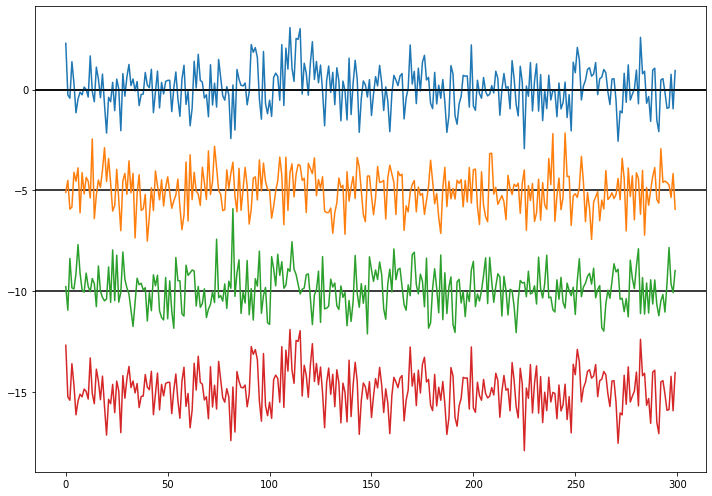

In [10]:
M = 100,
L = 100, 
N = 300, 
fs = 256, 
sigma2_v=1
PE, X = creoensamble()

fig, axs = plt.subplots(1, 1, figsize = (10, 7), tight_layout = True)
axs.axhline(0, 0, 1, color='k')
axs.plot(X[0])

axs.axhline(-5, 0, 1, color='k')
axs.plot(X[1] - 5)

axs.axhline(-10, 0, 1, color='k')
axs.plot(X[20] - 10)

axs.axhline(0, 0, 1, color='k')
axs.plot(X[0] - 15)

## El promedio ordinario es un estimador consistente

Como mido la varianza del estimador del promedio ordinario?

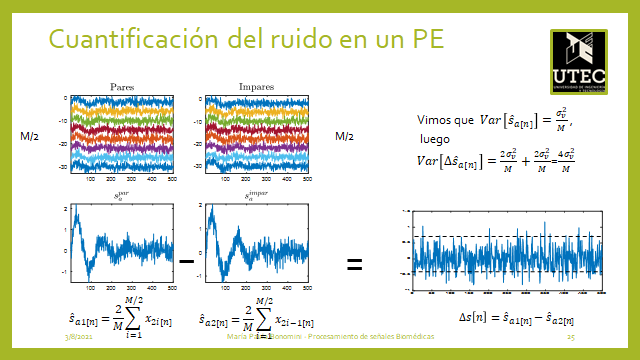

# Promedio Ordinario
Reproduzco la disminucion de varianza con las realizaciones

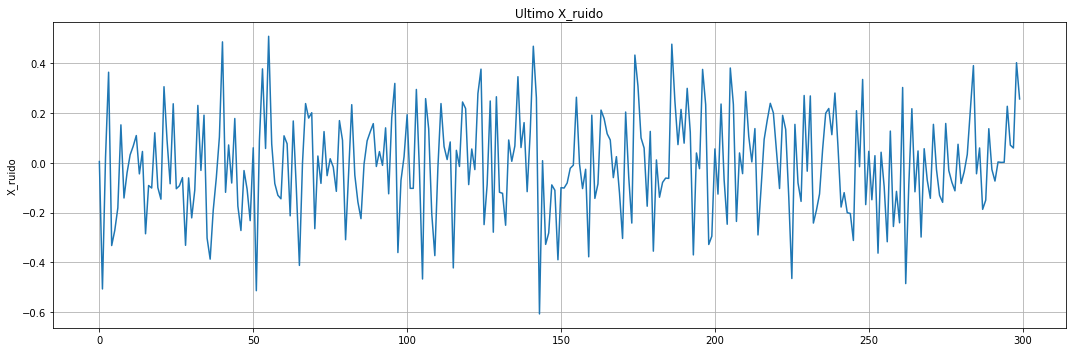

In [4]:
# Hecho por Paula
sigma_M = list()
M_max = 100
M_vector = np.arange(2, M_max, 2, dtype="int")

for M in M_vector:
  PE, X = creoensamble(M, L=100, N=300, fs=256)

  # Separamos ambos conjuntos
  X_pares = list()
  X_impares = list()
  for i in range(0,M):
    if i % 2 == 0:
      X_pares.append(X[i].copy())
    else:
      X_impares.append(X[i].copy())
  
  # Convertimos lista a numpy
  X_pares = np.asarray(X_pares, dtype='float64')
  X_impares = np.asarray(X_impares, dtype='float64')

  # Hacemos reshape para usar la función np.mean()
  X_pares = X_pares.reshape(M//2, -1)
  X_impares = X_impares.reshape(M//2, -1)

  # Calculamos los promedios ordinarios de cada mitad
  X_pares_mean = X_pares.mean(axis=0).flatten()
  X_impares_mean = X_impares.mean(axis=0).flatten()

  # Restamos para dejar solamente el ruido
  X_ruido = X_pares_mean - X_impares_mean

  # Agregamos el valor al vector
  sigma_M.append(np.var(X_ruido))

fig, axs = plt.subplots(1, 1, figsize =(15, 5), tight_layout = True)
# plt.plot(t_DB, PE, label = 'PE')
axs.plot(X_ruido)
axs.set_ylabel('X_ruido')
axs.set_title('Ultimo X_ruido')
axs.grid(True)

# Challenge: 
Determine cuántas realizaciones de $SNR_{orig}$ son necesarias para obtener un promedio con una $SNR_{fin}$ de 3 dB. Confirme el resultado analítico con una simulación.

La relación señal ruido para un proceso estocástico es la siguiente: 
$
SNR_{orig} = \frac{\mathbb{E}\left[S^2\right]}{\mathbb{E}[N^2]}
$
, siendo $X$ ruido blanco, con media $\mu_X=0$ y varianza $\sigma_X^2$

Siendo $PE$ potencial evocado determinístico, la señal observada en una realización será $S=X+PE$.

$$
SNR_{orig} = \frac{\mathbb{E}\left[(PE+X)^2\right]}{\mathbb{E}[X^2]} = \frac{\mathbb{E}\left[PE^2 + 2PE\cdot X + X^2\right]}{\mathbb{E}[X^2]} = \frac{PE^2 + 2PE\cdot\mathbb{E}[X] + \mathbb{E}[X^2]}{\mathbb{E}[X^2]} = \frac{PE^2+\sigma_X^2}{\sigma_X^2} = \frac{PE^2}{\sigma_X^2} + 1
$$

$\hat S$ es un estimador del potencial evocado, donde

$$
\hat S = \frac{1}{M} \cdot \sum_{i=1}^{M} (S_i)
$$

Entonces,

$$
SNR_{(M)} = \frac{\mathbb{E}\left[ \left(\frac{1}{M} \sum_{i=1}^{M} \left( PE_i + X_i \right) \right)^2\right]} {\mathbb{E}\left[ \left(\frac{1}{M} \sum_{i=1}^{M} \left( X_i \right) \right)^2 \right]}
$$

Sabiendo que $PE_i = PE\:\forall i$, por lo tanto:
$$
SNR_{(M)} = \frac{\mathbb{E}\left[\frac{1}{M^2} \left( M\cdot PE+\sum_{i=1}^{M} \left( X_i \right) \right)^2\right]} {\mathbb{E}\left[ \frac{1}{M^2}\left( \sum_{i=1}^{M} \left( X_i \right) \right)^2 \right]} = \frac{\mathbb{E}\left[\frac{1}{M^2} \left( M^2\cdot PE^2+2PE\sum_{i=1}^{M} \left( X_i \right) + \left(\sum_{i=1}^{M} \left( X_i \right)\right)^2\right)\right]} {\mathbb{E}\left[ \frac{1}{M^2}\left( \sum_{i=1}^{M} \left( X_i \right) \right)^2 \right]}
$$

Sabiendo que  $\left(\sum_{i=1}^{M} X_i\right)^2 = \sum_{i=1}^M \sum_{j=1}^M X_i\cdot X_j$. 

Como $X$ es ruido blanco descorrelacionado,
$$
\mathbb{E}\left[\left( \sum_{i=1}^{M} X_i \right)^2 \right] = \mathbb{E}\left[ \sum_{i=1}^M \left(\sum_{j=1}^M X_i\cdot X_j \right)\right] = \sum_{i=1}^M \left(\sum_{j=1}^M\mathbb{E}\left[  X_i\cdot X_j \right]\right) = \sum_{i=1}^M\mathbb{E}\left[(X_i)^2\right] = M\cdot\sigma_X^2
$$

$$
SNR_{(M)} = \frac{\frac{1}{M^2}\left(M^2\cdot PE^2 + 2PE\:\sum_{i=1}^M\left(\mathbb{E}\left[ X_i \right]\right)+ M\cdot\sigma_X^2\right)}{\frac{1}{M^2}\cdot M \cdot \sigma_X^2} = \frac{PE^2+\frac{\sigma_X^2}{M}}{\frac{\sigma_X^2}{M}} = M\cdot\frac{PE^2}{\sigma_X^2} + 1
$$

$$
SNR_{(M)} = M\cdot\left(SNR_{orig}-1\right)+1
$$
$$
M = \frac{SNR_{(M)}-1}{SNR_{orig}-1}
$$

In [18]:
M_3DB = int(400)
L_3DB = int(400)
N_3DB = int(800)
var_X = 0
var_S = 0

PE, X_orig = creoensamble(M_3DB,L_3DB,N_3DB,256,1)

#Utilizo el promedio de la varianza de cada realización del ensamble para reducir la varianza del estimador de la varianza
for i in np.arange(M_3DB):
  var_X = var_X + np.var(X_orig[0][0:L_3DB])/M_3DB
  var_S = var_S + np.var(X_orig[0][L_3DB:N_3DB])/M_3DB
  
SNR_orig = var_S/var_X
SNR_fin = 10**(3/10)

M_3DB = int(np.ceil((SNR_fin-1)/(SNR_orig-1)))

print('SNR_orig = ', f'{SNR_orig:.3f}', ' veces')
print('SNR_fin = ', f'{SNR_fin:.3f}', ' veces')
print('M = ', M_3DB)

SNR_orig =  1.094  veces
SNR_fin =  1.995  veces
M =  11


In [20]:
res_3DB = np.zeros(len(X_orig[0]))
for i in np.arange(M_3DB):
  res_3DB = X_orig[i]/M_3DB + res_3DB

SNR_fin = np.var(res_3DB[L_3DB:N_3DB])/np.var(res_3DB[0:L_3DB])
print('SNR_fin = ', f'{SNR_fin:.3f}', 'veces')

SNR_fin =  1.263 veces


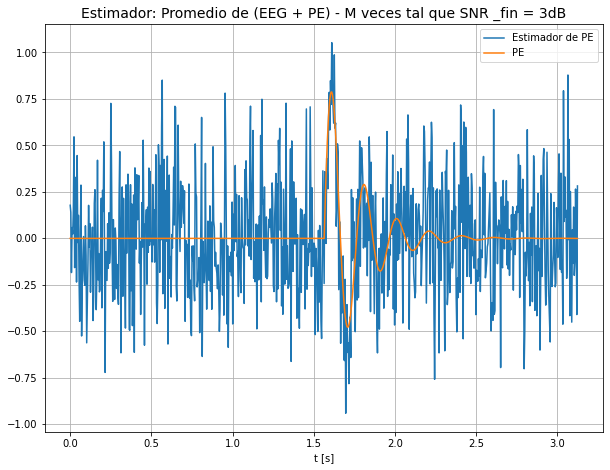

In [21]:
t_DB = np.linspace(0,N_3DB/256,N_3DB)
 

plt.plot(t_DB, res_3DB, label='Estimador de PE')
plt.plot(t_DB, PE, label = 'PE')
plt.xlabel('t [s]')
plt.legend(loc='best')
plt.grid()
plt.gcf().set_size_inches((10,7.5))
plt.title('Estimador: Promedio de (EEG + PE) - M veces tal que SNR _fin = 3dB',fontsize=14)
plt.show()

# Exponencial

#### Determinar la consistencia del Promedio Exponencial

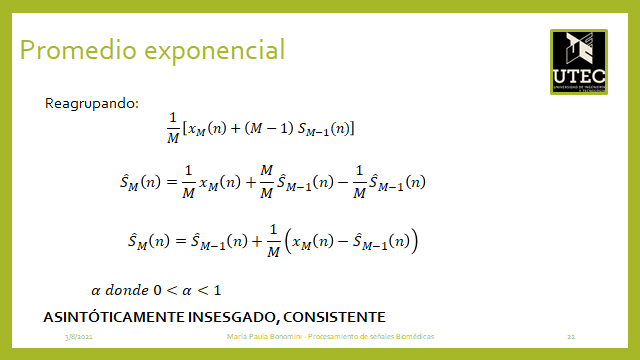

In [8]:
# Largo de la observación
N=300

# Definimos varios valores de alfa
alfas = [0.005, 0.01, 0.05]

# Inicialización para la recursión
sHat_eM = np.zeros((len(alfas), N), dtype='float64')

# Varianzas Ruido y Senhal
sigma2_ruido = np.zeros(len(alfas), dtype='float64')
sigma2_senal = np.zeros(len(alfas), dtype='float64')

# Definimos M máximo para controlar el ciclo
M_max = 100
# Armamos vector de M con fines gráficos y de control del ciclo
M_vector = np.arange(1, M_max+1, dtype="int")

# Espacio para guardar la varianza del ruido respecto de M
sigma2_ruido_M = np.zeros((len(alfas), M_max), dtype="float64")
# Espacio para guardar la SNR respecto de M
SNR_M = np.zeros((len(alfas), M_max), dtype="float64")

for M in M_vector:
  # "Obtenemos" X
  PE, X = creoensamble(1, L=100, N=N, fs=256)

  for alfa_idx in range(0, len(alfas)):
    # Promedio Exponencial
    sHat_eM[alfa_idx] = sHat_eM[alfa_idx] + alfas[alfa_idx]*(X - sHat_eM[alfa_idx])

    # Tomo las primeras 100 muestras para calcular la potencia del ruido, ya que sé que en esas primeras muestras no tengo señal
    sigma2_ruido[alfa_idx] = np.var(sHat_eM[alfa_idx, 0:100])
    # Calculamos la potencia de la señal
    sigma2_senal[alfa_idx] = np.var(sHat_eM[alfa_idx, 100:].flatten())
    # SNR
    SNR_M[alfa_idx, M-1] = sigma2_senal[alfa_idx]/sigma2_ruido[alfa_idx]

    # Agregamos el valor al vector
    sigma2_ruido_M[alfa_idx, M-1] = sigma2_ruido[alfa_idx]

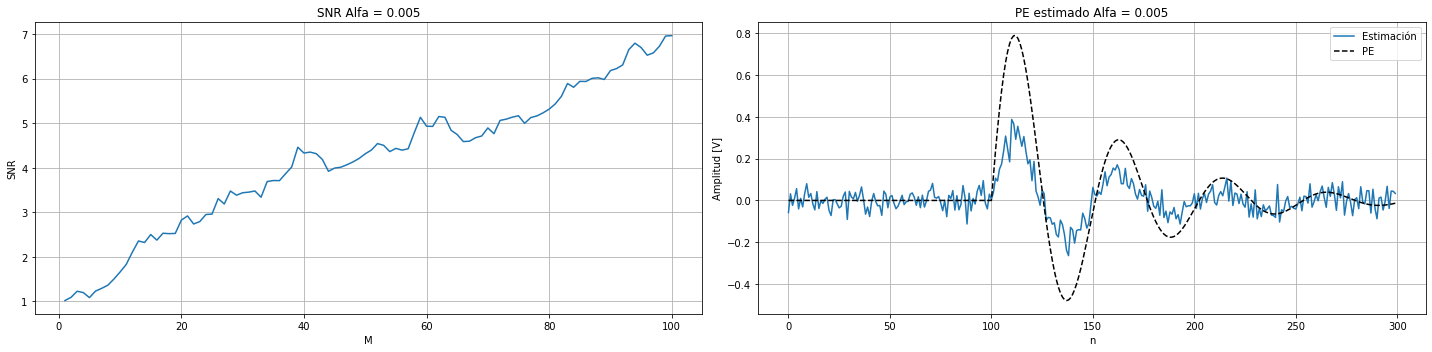

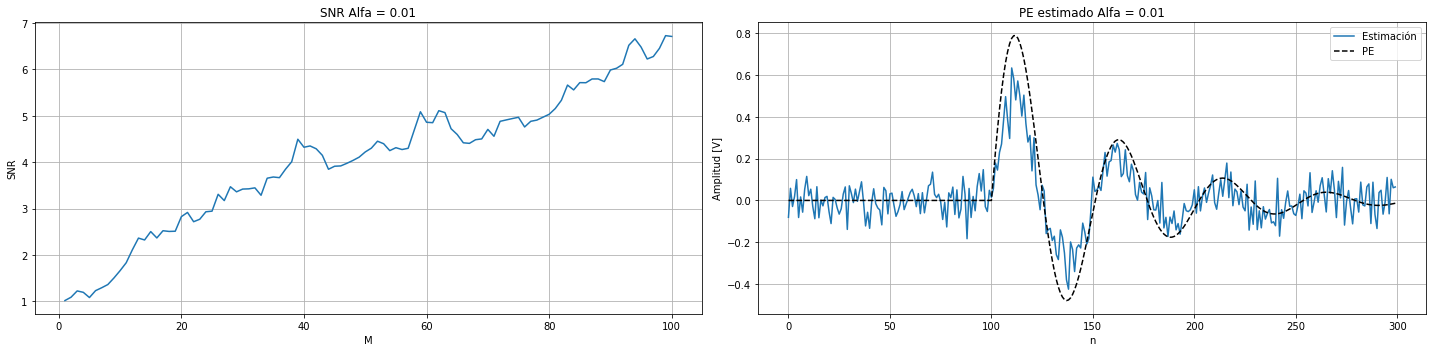

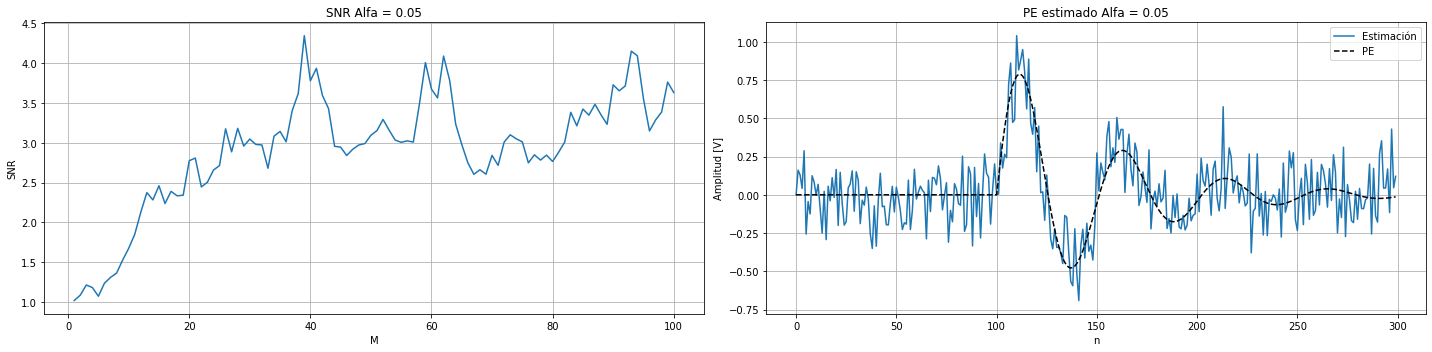

In [9]:
for alfa_idx in range(0, len(alfas)):
  fig, axs = plt.subplots(1, 2, figsize=(20,5), tight_layout=True)
  axs[0].plot(M_vector, SNR_M[alfa_idx])
  axs[0].set_xlabel('M')
  axs[0].set_ylabel('SNR')
  axs[0].set_title('SNR Alfa = {}'.format(alfas[alfa_idx]))
  axs[0].grid(True)

  axs[1].plot(sHat_eM[alfa_idx])
  axs[1].plot(PE.flatten(), 'k--')
  axs[1].set_xlabel('n')
  axs[1].set_ylabel('Amplitud [V]')
  axs[1].set_title('PE estimado Alfa = {}'.format(alfas[alfa_idx]))
  axs[1].grid(True)
  axs[1].legend(['Estimación', 'PE'])